In [20]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN,AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score,silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [22]:
# TASK 3: CUSTOMER SEGMENTATION
scaler = StandardScaler()
customer_features = transactions.groupby("CustomerID")["TotalValue"].sum().reset_index()
customer_features = customer_features.merge(customers, on="CustomerID")
customer_scaled = scaler.fit_transform(customer_features[['TotalValue']])

Davies-Bouldin Index: 0.5824704951796619
Silhouette Score: 0.5181415347471572


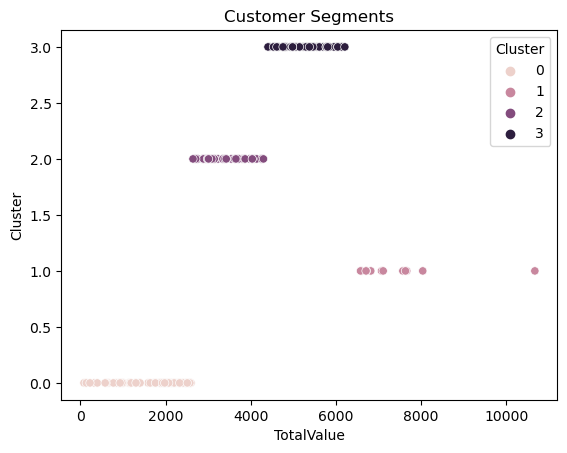

In [23]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
customer_features['Cluster'] = agg_clustering.fit_predict(customer_scaled)
db_index = davies_bouldin_score(customer_scaled, customer_features['Cluster'])
silhouette_avg = silhouette_score(customer_scaled, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

sns.scatterplot(x=customer_features['TotalValue'], y=customer_features['Cluster'], hue=customer_features['Cluster'])
plt.title("Customer Segments")
plt.show()